# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
pwd

u'/Users/DRN/dsilabs'

In [2]:
import pandas as pd
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv('datasets/salary.csv', delim_whitespace=True)
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [4]:
df.rename(columns={'sx': 'sex', 'rk': 'rank', 'yr':'years employed', 'dg':'degree', 'yd':'years post degree', 'sl': 'salary'}, inplace=True)

In [5]:
df.head()

,sex,rank,years employed,degree,years post degree,salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [6]:
df = pd.concat([df, df['sex'].str.get_dummies(sep=',')], axis=1)

In [7]:
df.head()

,sex,rank,years employed,degree,years post degree,salary,female,male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1


In [8]:
rank_dummies = pd.get_dummies(df['rank'])

In [9]:
rank_dummies.head()

,assistant,associate,full
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
df = df.join(rank_dummies)

In [11]:
df.head()

,sex,rank,years employed,degree,years post degree,salary,female,male,assistant,associate,full
0,male,full,25,doctorate,35,36350,0,1,0,0,1
1,male,full,13,doctorate,22,35350,0,1,0,0,1
2,male,full,10,doctorate,23,28200,0,1,0,0,1
3,female,full,7,doctorate,27,26775,1,0,0,0,1
4,male,full,19,masters,30,33696,0,1,0,0,1


In [12]:
degree_dummies = pd.get_dummies(df['degree'])

In [13]:
degree_dummies.head()

,doctorate,masters
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
df = df.join(degree_dummies)

In [15]:
df

,sex,rank,years employed,degree,years post degree,salary,female,male,assistant,associate,full,doctorate,masters
0,male,full,25,doctorate,35,36350,0,1,0,0,1,1,0
1,male,full,13,doctorate,22,35350,0,1,0,0,1,1,0
2,male,full,10,doctorate,23,28200,0,1,0,0,1,1,0
3,female,full,7,doctorate,27,26775,1,0,0,0,1,1,0
4,male,full,19,masters,30,33696,0,1,0,0,1,0,1
5,male,full,16,doctorate,21,28516,0,1,0,0,1,1,0
6,female,full,0,masters,32,24900,1,0,0,0,1,0,1
7,male,full,16,doctorate,18,31909,0,1,0,0,1,1,0
8,male,full,13,masters,30,31850,0,1,0,0,1,0,1
9,male,full,13,masters,31,32850,0,1,0,0,1,0,1


In [16]:
df.dtypes

sex                  object
rank                 object
years employed        int64
degree               object
years post degree     int64
salary                int64
female                int64
male                  int64
assistant             uint8
associate             uint8
full                  uint8
doctorate             uint8
masters               uint8
dtype: object

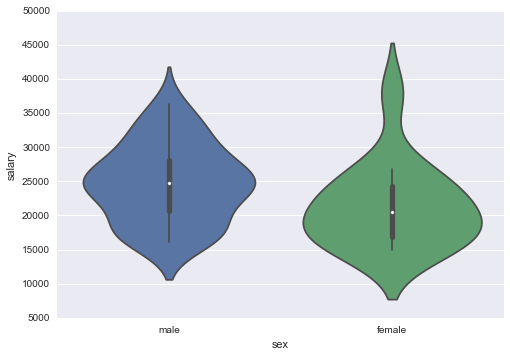

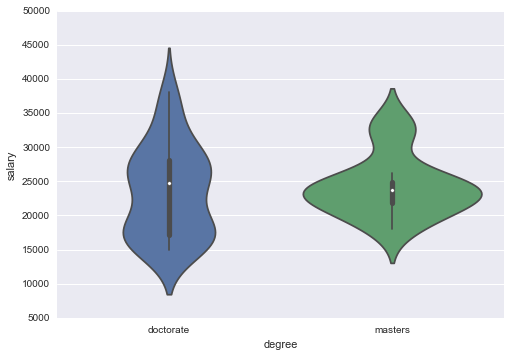

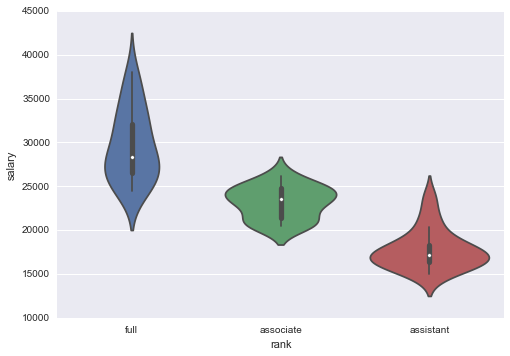

In [17]:
sns.violinplot(x="sex", y="salary", data=df)
plt.show()

sns.violinplot(x="degree", y="salary", data=df)
plt.show()

sns.violinplot(x="rank", y="salary", data=df)
plt.show()

In [18]:
lm = linear_model.LinearRegression()

In [19]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'years employed', u'years post degree']]
y = subset[u'salary']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'years employed', u'years post degree']]
y = df[u'salary']
print "All data with sample model:", model.score(X, y)

Sample: 0.925310096975
All data with sample model: 0.275205205434


In [20]:
# Repeat with regularization

X = subset[[u'years employed', u'years post degree']]
y = subset[u'salary']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

Sample with regularization: 0.924727338288


In [21]:
# Apply to the whole data set

X = df[[u'years employed', u'years post degree']]
y = df[u'salary']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

All data with regularization model: 0.335642234252


In [22]:
# Fit a model to the men
mask = df["sex"] == "male"
X = df[mask][[u'years employed', u'years post degree' , u'doctorate', u'masters', u'assistant', u'associate', u'full']]
y = df[mask][u'salary']

In [23]:
## Fit a linear model here
lm = linear_model.LinearRegression()

In [24]:
model = lm.fit(X, y)
predictions = lm.predict(X)
print predictions

[ 33914.5788274   29987.03856193  28325.44689312  33449.445809
  31648.63023074  32128.42312659  30446.12440193  30286.19343665
  29486.48499409  25808.68820586  28784.47911696  23264.45263879
  27664.96235999  28103.23391184  30306.90049249  26344.66232315
  25684.17779002  28381.62811456  22183.87800892  22124.17520982
  28423.0958424   23924.88355577  26622.33388031  24606.12876089
  23459.75053737  21860.44088455  23625.83591336  20119.38172155
  20400.24790886  17477.38997289  17317.45900761  17477.38997289
  16976.83640505  17595.85321033  20219.55627158  16636.21380249
  16956.07573305  16455.52216521]


r^2: 0.88630543814


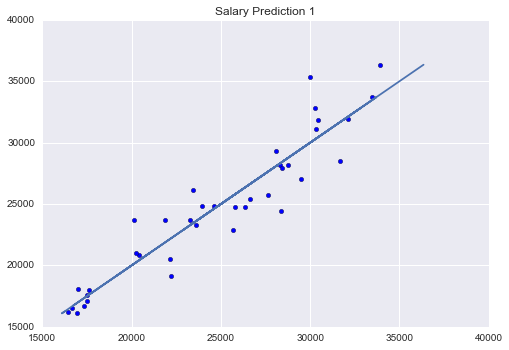

In [25]:
## Plot the data
# print X
plt.scatter(predictions, y)
plt.plot(y,y)
plt.title("Salary Prediction 1")
# plt.plot(predictions, X)
# plt.show()
print "r^2:", model.score(X, y)

# # Apply the same model to the women and compare the model score

In [26]:
# Fit a model to the men
maskf = df["sex"] == "female"
Xf = df[maskf][[u'years employed', u'years post degree' , u'doctorate', u'masters', u'assistant', u'associate', u'full']]
yf = df[maskf][u'salary']

In [27]:
lmf = linear_model.LinearRegression()

In [28]:
model = lmf.fit(Xf, yf)
predictionsf = lmf.predict(Xf)
print predictions

[ 33914.5788274   29987.03856193  28325.44689312  33449.445809
  31648.63023074  32128.42312659  30446.12440193  30286.19343665
  29486.48499409  25808.68820586  28784.47911696  23264.45263879
  27664.96235999  28103.23391184  30306.90049249  26344.66232315
  25684.17779002  28381.62811456  22183.87800892  22124.17520982
  28423.0958424   23924.88355577  26622.33388031  24606.12876089
  23459.75053737  21860.44088455  23625.83591336  20119.38172155
  20400.24790886  17477.38997289  17317.45900761  17477.38997289
  16976.83640505  17595.85321033  20219.55627158  16636.21380249
  16956.07573305  16455.52216521]


r^2: 0.781837240731


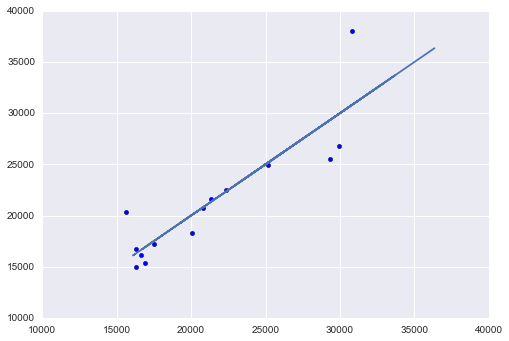

In [29]:
plt.scatter(predictionsf, yf)
plt.plot(y,y)
print "r^2:", model.score(Xf, yf)

In [30]:
mask = df["sex"] == "male"
X = df[mask][[u'assistant', u'associate', u'full']]
y = df[mask][u'salary']

In [31]:
model = lm.fit(X, y)
predictions = lm.predict(X)
print predictions

[ 29872.4375      29872.4375      29872.4375      29872.4375      29872.4375
  29872.4375      29872.4375      29872.4375      29872.4375
  23443.58333333  29872.4375      23443.58333333  29872.4375      29872.4375
  29872.4375      23443.58333333  23443.58333333  29872.4375      17919.6
  23443.58333333  29872.4375      23443.58333333  29872.4375
  23443.58333333  23443.58333333  23443.58333333  23443.58333333  17919.6
  23443.58333333  17919.6         17919.6         17919.6         17919.6
  17919.6         23443.58333333  17919.6         17919.6         17919.6       ]


r^2: 0.768669308711


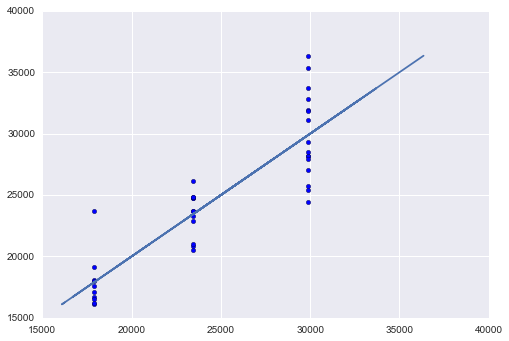

In [32]:
plt.scatter(predictions, y)
plt.plot(y,y)
print "r^2:", model.score(X, y)

In [33]:
lmf = linear_model.LinearRegression()

In [34]:
maskf = df["sex"] == "female"
Xf = df[maskf][[u'assistant', u'associate', u'full']]
yf = df[maskf][u'salary']

In [35]:
model = lm.fit(Xf, yf)
predictions = lm.predict(Xf)
print predictions

[ 28805.  28805.  28805.  28805.  17580.  21570.  21570.  17580.  17580.
  17580.  17580.  17580.  17580.  17580.]


r^2: 0.683156134892


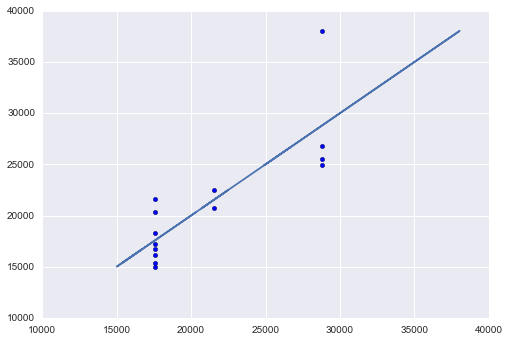

In [36]:
plt.scatter(predictions, yf)
plt.plot(yf,yf)
print "r^2:", model.score(Xf, yf)